In [1]:
import arviz as az
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray
xarray.set_options(display_style="html");

In [2]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
df2=d[d.age>18]
d.head()
df2.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [3]:
height = df2.height.values
weight = df2.weight.values
age = df2.age.values
names = df2.index.values
N = len(names)

dims={
    "height": ["developer"],
    "wight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as model:
    
    
    mu = pm.Normal('mu', mu=167, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df2.height)
    
    # BUİLDS PRIOR PREDICTİVE DIST
    
    trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 23 seconds.


0, dim: developer, 346 =? 346


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

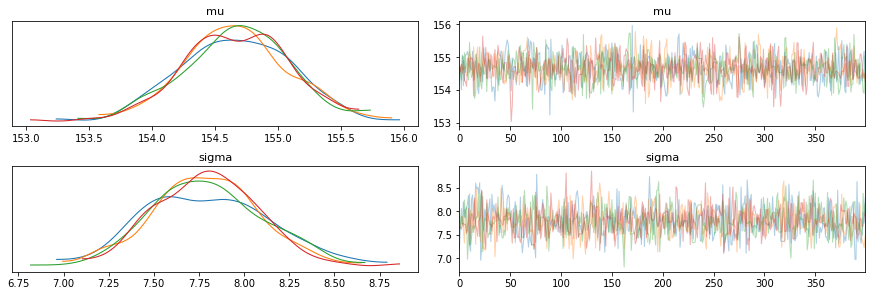

In [4]:
az.plot_trace(trace) #plot trace and hist=kde

<AxesSubplot:xlabel='height'>

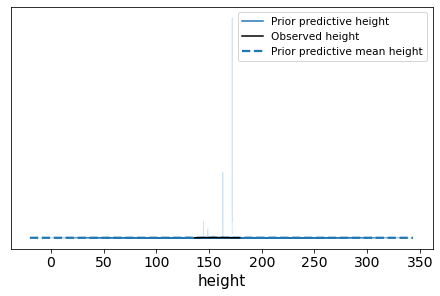

In [5]:
az.plot_ppc(idata_pymc3 ,group='prior') # plot prior predictive dist

Now the model, before seeing the
data, expects some of people to have negative height. It also expects some giants. One of the tallest people in recorded history, Robert Pershing Wadlow
(1918–1940) stood 272cm tall. In our prior predictive simulation, 18% of people (right of
solid line) are taller than this.
Does this matter? It is true is this case that we have so much data that even this silly
prior is harmless. But that won’t always be the case. There are plenty of inference problems
for which the data alone are not sufficient, no matter how numerous. Bayes lets us proceed
in these cases. But only if we use our scientific knowledge to construct sensible priors.


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

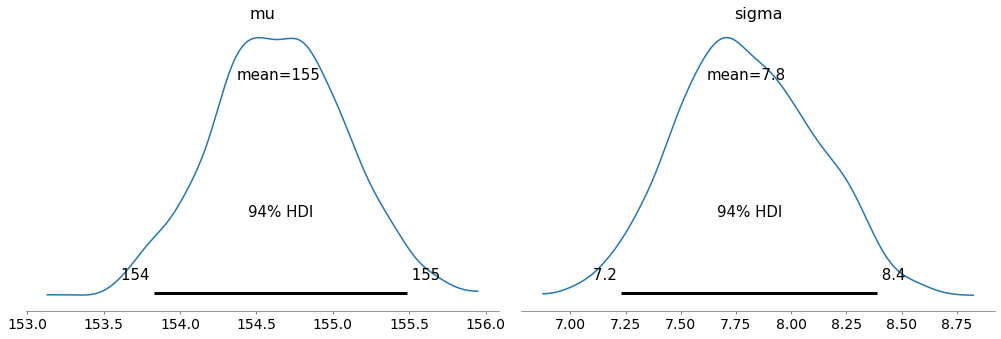

In [5]:
az.plot_posterior(trace) # plot posterior distributıon after seing data

<AxesSubplot:xlabel='height'>

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


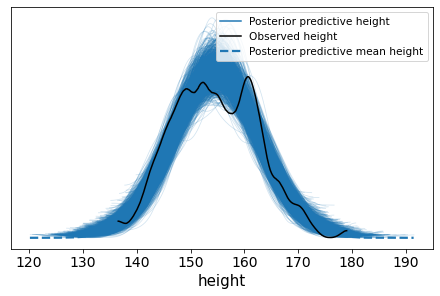

In [4]:
az.plot_ppc(idata_pymc3 ,group='posterior')#posterior predictive dist

HW Gauss1: Repeat the same procedure 


    a) for females above 18
    
    b) for males above 18.

Linear regression:
<p>
Typically, we are interested in modeling how an outcome is related to some other variable, a predictor variable. If the predictor
variable has any statistical association with the outcome variable, then we can use it to predict
the outcome. When the predictor variable is built inside the model in a particular way, we’ll
have linear regression.
 </p>
 <p>
So now let’s look at how height in these Kalahari foragers (the outcome variable) covaries
with weight (the predictor variable). This isn’t the most thrilling scientific question, I know.
But it is an easy relationship to start with, and if it seems dull, it’s because you don’t have
a theory about growth and life history in mind. 
    </p>
Plot height and weight against one another to get an idea of how strongly
they covary:

In [8]:
df2.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


<AxesSubplot:xlabel='weight', ylabel='height'>

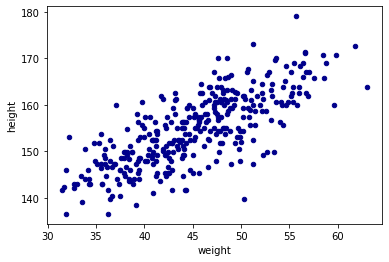

In [11]:
df2.plot.scatter(x='weight',

                      y='height',

                      c='DarkBlue')

<h2> The linear model strategy</h2>
<p>
The strategy is to make the parameter for the mean ofa Gaussian distribution, μ, into a linear function of the predictor variable and other, new parameters that we invent. This strategy is often simply called the linear model. The linear
model strategy instructs the machinery to assume that the predictor variable has a constant and
additive relationship to the mean of the outcome. The machinery then computes the posterior
distribution of this constant relationship.</p>
<p>
What this means, recall, is that the machine considers every possible combination of the
parameter values. With a linear model, some of the parameters now stand for the strength
of association between the mean of the outcome, μ, and the value of some other variable.</p>
<p>
For each combination of values, the machine computes the posterior probability, which is
a measure of relative plausibility, given the model and data. So the posterior distribution
ranks the infinite possible combinations of parameter values by their logical plausibility.</p>
<p> As a result, the posterior distribution provides relative plausibilities of the different possible
strengths of association, given the assumptions you programmed into the model. We ask
the golem: “Consider all the lines that relate one variable to the other. Rank all of these lines
by plausibility, given these data.” </p>

<h2>how do we get weight into a Gaussian model of height?</h2> Let x be the name for the
column of weight measurements, d2[weight]. Let the average of the x values be ¯x, “ex bar”.
Now we have a predictor variable x, which is a list of measures of the same length as h. To get
weight into the model, we define the mean μ as a function of the values in x. This is what it
looks like, with explanation to follow:
$$


hi ∼ Normal(μi, σ) [likelihood]


μi = α + β(xi − ¯x) [linear model]


α ∼ Normal(178, 20) [α prior]


β ∼ Normal(0, 10) [β prior]


σ ∼ Uniform(0, 50)
$$

<p>The mean μ is no longer a parameter to be estimated. Rather, as
seen in the second line of the model, μi is constructed from other parameters, α and β, and
the observed variable x. This line is <b>not a stochastic relationship </b>—there is no <b>∼</b> in it, but rather an <b> = </b>in it—because the definition of μi is deterministic. That is to say that, once we
know α and β and xi, we know μi with certainty.</p>


(1) What is the expected height when xi = ¯x? The parameter α answers this question,
because when xi = ¯x, μi = α. For this reason, α is often called the intercept. But we
should think not in terms of some abstract line, but rather in terms of the meaning
with respect to the observable variables.


(2) What is the change in expected height, when xi changes by 1 unit? The parameter
β answers this question. It is often called a “slope,” again because of the abstract
line. Better to think of it as a rate of change in expectation.


<p>pNothing special or natural about linear models. Note that there’s nothing special about
the linear model, really. You can choose a different relationship between α and β and μ. For example,
the following is a perfectly legitimate definition for μi:</p>
$$
μi = α  exp(−βxi)
$$
<p>This does not define a linear regression, but it does define a regression model. The linear relationship we are using instead is conventional, but nothing requires that you use it. It is very common in some fields, like ecology and demography, to use functional forms for μ that come from theory. Models built out of substantive theory can dramatically outperform
linear models of the same phenomena.

In [12]:
df2.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [6]:
height = df2.height.values
weight = df2.weight.values
age = df2.age.values
names = df2.index.values
N = len(names)

df2 = df2.assign(weight_c=pd.Series(df2.weight - df2.weight.mean()))#scaling
dims={
    "height": ["developer"],
    "wight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * df2.weight_c
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df2.height)
    
    # BUİLDS PRIOR PREDICTİVE DIST
    
    trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 29 seconds.


0, dim: developer, 346 =? 346


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

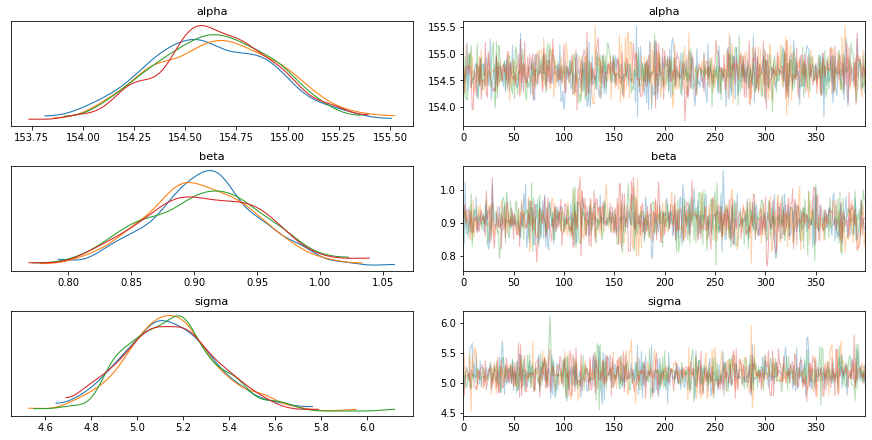

In [7]:
az.plot_trace(trace)

In [22]:
prior


{'height': array([[175.74667054, 306.4712053 , 383.98065308, ..., 183.14721663,
          30.18509044,  90.88582607],
        [304.77022402, 356.96488769, 370.70599246, ..., 267.67024901,
         251.58803694, 253.86093541],
        [221.22187016, 293.03386249, 238.04366622, ..., 206.67932289,
         260.18734486, 231.75735704],
        ...,
        [121.5579023 ,  52.08270146,  27.42264153, ..., 313.24781648,
         315.36020186, 227.42632255],
        [ -9.47459209,  41.91264256,  61.89973109, ..., -21.97281802,
         -25.57011252, -43.20876908],
        [196.40403483, 404.05169903, 368.48011413, ..., 126.31293907,
          71.25606888,  51.32982609]]),
 'beta': array([-12.44563722,  -5.47657812,   0.24528171, -10.68077488,
          1.14263042,  -1.8603713 ,  -5.6812932 ,  15.91444135,
         13.12565605, -21.93572418, -11.10198468,  20.27634403,
         -4.54173731,  14.46927046, -15.15677217,  -0.49188808,
         13.80611471,  -3.11065279, -15.63252926, -16.96991516,

The prior for β deserves explanation. Why have a Gaussian prior with mean zero? This
prior places just as much probability below zero as it does above zero, and when β = 0,
weight has no relationship to height. To figure out what this prior implies, we have to simulate
the prior predictive distribution.

In [8]:
df2["weight"].min()

31.524644

In [9]:
df2["weight"].max()

62.992589

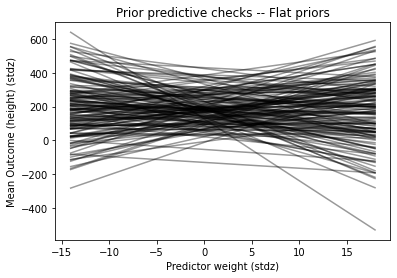

In [10]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

x = np.linspace(31,63,100)
x=x-df2["weight"].mean()
xbar=df2.mean()

for a, b in zip(prior['alpha'], prior["beta"]):
    y = a + b * x
    
    ax.plot(x, y,c="k",alpha=0.4)

ax.set_xlabel("Predictor weight (stdz)")
ax.set_ylabel("Mean Outcome (height) (stdz)")
ax.set_title("Prior predictive checks -- Flat priors");

<p>no one is shorter than zero—and the world’s tallest person is  272cm  The
pattern doesn’t look like any human population at all. It essentially says that the relationship
between weight and height could be absurdly positive or negative. Before we’ve even seen
the data, this is a bad model. Can we do better?</p>
<p>
We can do better immediately. We know that average height increases with average
weight, at least up to a point. Let’s try restricting it to positive values. The easiest way to do
this is to define the prior as Log-Normal instead. </p>
<p>If the logarithm of β is normal, then β itself is strictly positive. The reason is that exp(x)
is greater than zero for any real number x. This is the reason that Log-Normal priors are
commonplace.</p>
$$β ∼ Log-Normal(0, 1)$$

In [11]:
height = df2.height.values
weight = df2.weight.values
age = df2.age.values
names = df2.index.values
N = len(names)

df2 = df2.assign(weight_c=pd.Series(df2.weight - df2.weight.mean()))#scaling
dims={
    "height": ["developer"],
    "wight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as logmodel:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Lognormal("beta", mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * df2.weight_c
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df2.height)
    
    # BUİLDS PRIOR PREDICTİVE DIST
    
    tracelog = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictivelog = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    priorlog = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 22 seconds.


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:314: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)


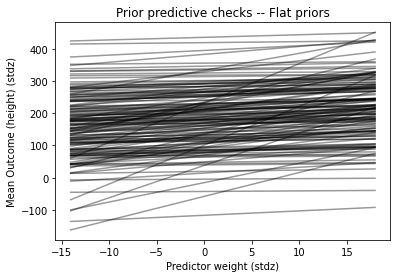

In [12]:
_, ax = plt.subplots()

x = np.linspace(31,63,100)
x=x-df2["weight"].mean()
xbar=df2.mean()

for a, b in zip(priorlog['alpha'], priorlog["beta"]):
    y = a + b * x
    
    ax.plot(x, y,c="k",alpha=0.4)

ax.set_xlabel("Predictor weight (stdz)")
ax.set_ylabel("Mean Outcome (height) (stdz)")
ax.set_title("Prior predictive checks -- Flat priors");

<p>
We’re fussing about this prior, even though as you’ll see in the next section there is so
much data in this example that the priors end up not mattering. We fuss for two reasons.
    </p>
    <p>
First, there are many analyses in which no amount of data makes the prior irrelevant. In such
cases, non-Bayesian procedures are no better off. They also depend upon structural features
of the model. Paying careful attention to those features is essential. 
    </p>
    <p>Second, thinking about
the priors helps us develop better models</p>
<p>
 What’s the correct prior? People commonly ask what the correct prior is for a given
analysis. The question sometimes implies that for any given set of data, there is a uniquely correct
prior that must be used, or else the analysis will be invalid. This is a mistake. There is no more a
uniquely correct prior than there is a uniquely correct likelihood. </p><p>Statistical models are machines for
inference. Many machines will work, but some work better than others. Priors can be wrong, but
only in the same sense that a kind of hammer can be wrong for building a table.</p>
<p>
In choosing priors, there are simple guidelines to get you started. Priors encode states of information
before seeing data. So priors allow us to explore the consequences of beginning with different
information. In cases in which we have good prior information that discounts the plausibility of some
parameter values, like negative associations between height and weight, we can encode that information
directly into priors. When we don’t have such information, we still usually know enough about
the plausible range of values. And you can vary the priors and repeat the analysis in order to study
how different states of initial information influence inference. Frequently, there are many reasonable
choices for a prior, and all of them produce the same inference</p>

<h1> HW  :</h1>
    Try other kinds/ values for beta prior to improve the prior distribution ( No 4m heigh people)

<h1>Posterior</h1>

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

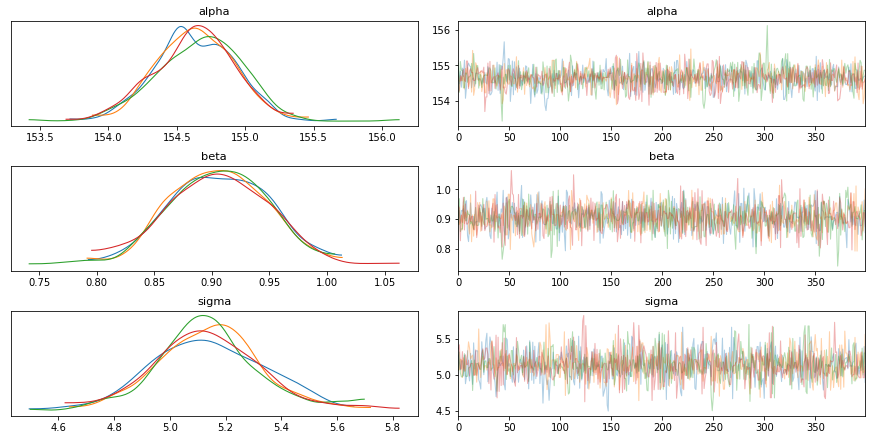

In [13]:
pm.plot_trace(  tracelog )

One trouble with statistical models is that
they are hard to understand. Once you’ve fit the model, it can only report posterior distribution.
This is the right answer to the question you asked. But it’s your responsibility to process
the answer and make sense of it.
There are two broad categories of processing: (1) reading tables and (2) plotting simulations.


<h2>tables</h2>

In [14]:


az.summary(tracelog, kind="stats")



/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
alpha,154.640,0.290,154.143,155.195
beta,0.906,0.043,0.825,0.986
sigma,5.140,0.195,4.782,5.525


Let’s focus on (β). Since β is a slope, the value 0.90
can be read as a person 1 kg heavier is expected to be 0.90 cm taller. 95% of the posterior
probability lies between 0.82 and 0.98. That suggests that β values close to zero or greatly
above one are highly incompatible with these data and this model. It is most certainly not
evidence that the relationship between weight and height is linear, because the model only
considered lines. It just says that, if you are committed to a line, then lines with a slope
around 0.9 are plausible ones.

In [15]:
trace_log_df = pm.trace_to_dataframe(tracelog)
trace_log_df.cov().round(3)


,alpha,beta,sigma
alpha,0.084,0.000,0.001
beta,0.000,0.002,-0.000
sigma,0.001,-0.000,0.038


Very little covariation among the parameters in this case.The lack of covariance among the parameters results from the something called centering.

<h2>plots</h2>

Start with a simple version of that task, superimposing just the posterior
mean values over the height and weight data.

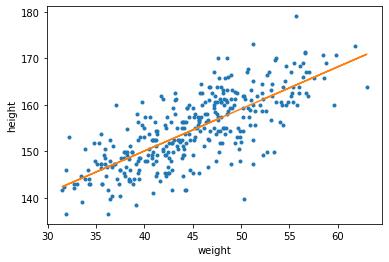

In [16]:
plt.plot(df2.weight, df2.height, ".")
plt.plot(df2.weight, tracelog["alpha"].mean() + tracelog["beta"].mean() * (df2.weight_c))
plt.xlabel(df2.columns[1])
plt.ylabel(df2.columns[0]);


This is not a bad line. It certainly looks highly plausible. But there an infinite number of other highly plausible lines
near it.


<h2>Adding uncertainty around the mean.</h2>
The posterior mean line is just the posterior
mean, the most plausible line in the infinite universe of lines the posterior distribution
has considered. Plots of the average line, like Figure 4.6, are useful for getting an impression
of the magnitude of the estimated influence of a variable. But they do a poor job of
communicating uncertainty. Remember, the posterior distribution considers every possible
regression line connecting height to weight. It assigns a relative plausibility to each. This
means that each combination of α and β has a posterior probability. It could be that there
are many lines with nearly the same posterior probability as the average line. Or it could be
instead that the posterior distribution is rather narrow near the average line.
So how can we get that uncertainty onto the plot?


Let start with finding the possible height for an individual who weighs 50kg. We can quickly make
a list ofvalues of μ for an individual who weighs 50 kilograms, by using our samples
from the posterior:

In [17]:
mu_at_50 = tracelog["alpha"] +tracelog["beta"] * (50 - df2.weight.mean())


<AxesSubplot:title={'center':'x'}>

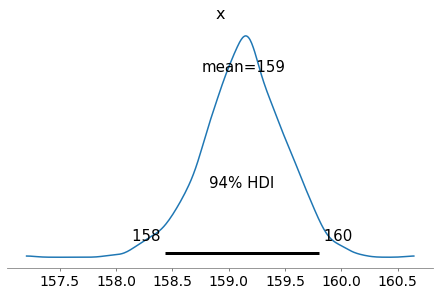

In [18]:
az.plot_posterior(mu_at_50)

In [19]:
mu50_hpd = pm.hpd(mu_at_50) #we have 95 hpd for an individual who weighs 50kg
mu50_hpd

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:334: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(


array([158.43756521, 159.79701243])

Now we have to find it for each  weight value

In [20]:
mulist=list()
for  val in df2["weight_c"]:
       mulist.append((tracelog["alpha"] +tracelog["beta"] * val)) 
nmulis=np.stack(mulist,axis=1)        
nmulis.shape

(1600, 346)


x_data = np.random.normal(0, 1, 100)

y_data = np.random.normal(2 + x_data * 0.5, 0.5, (2, 50, 100))

az.plot_hdi(x_data, y_data)

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


<AxesSubplot:>

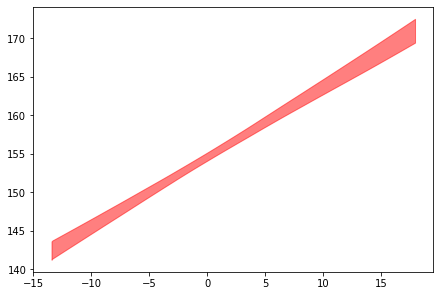

In [22]:
az.plot_hdi(df2["weight_c"], nmulis,color="red")

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'height')

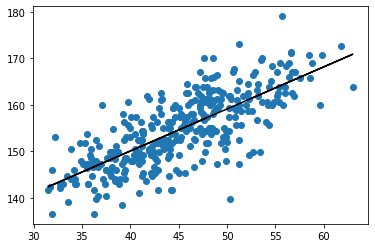

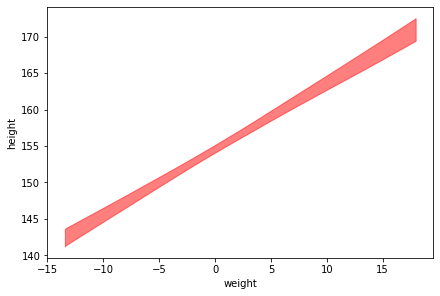

In [27]:

plt.scatter(df2.weight, df2.height)

plt.plot(df2.weight, tracelog["alpha"].mean() + tracelog["beta"].mean() * (df2.weight_c),color="black")
az.plot_hpd(df2["weight_c"], nmulis,color="red")
plt.xlabel(df2.columns[1])
plt.ylabel(df2.columns[0])

<h2> There is an easier way </h2>
We can let the model hold the calculated mu values for us.


In [28]:
height = df2.height.values
weight = df2.weight.values
age = df2.age.values
names = df2.index.values
N = len(names)

df2 = df2.assign(weight_c=pd.Series(df2.weight - df2.weight.mean()))#scaling
dims={
    "height": ["developer"],
    "wight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as deterministicHeightweight:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta * (df2.weight-df2.weight.mean()))
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df2.height)
    tracedeterminist = pm.sample(1000, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive_determinist = pm.sample_posterior_predictive( tracedeterminist)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior_determinist = pm.sample_prior_predictive(1000) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior_determinist,
        posterior_predictive=posterior_predictive_determinist,
        coords={"developer": names},
        dims=dims
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


arviz.data.io_pymc3 - WARNING - posterior predictive variable height's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


0, dim: developer, 346 =? 346


In [167]:
%matplotlib inline

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


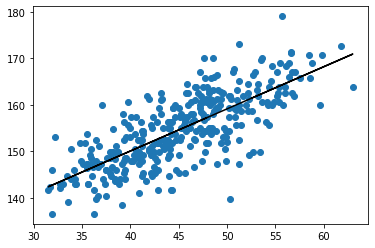

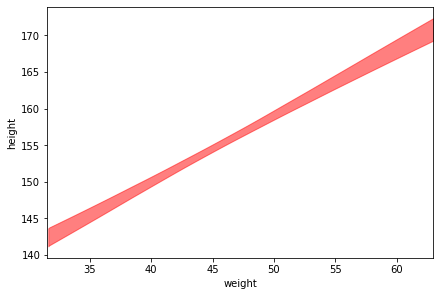

In [29]:
plt.scatter(df2.weight, df2.height)
#plt.plot(d2.weight, postriorprobgirdilike["mu"].T, "k",color="yellow")#all the possible lines
plt.plot(df2.weight, tracedeterminist["alpha"].mean() + tracedeterminist["beta"].mean() * (df2.weight_c),color="black")
az.plot_hpd(df2.weight, tracedeterminist["mu"],color="red")#lines with  95 hpd interval
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(df2.weight.min(), df2.weight.max());

Conditional on the assumption that
height and weight are related by a straight line, then this is the most plausible line, and these are its
plausible bounds.

<h2>Prediction intervals</h2>.
<p>Now let’s walk through generating an 89% prediction interval
for actual heights, not just the average height, μ. This means we’ll incorporate the
standard deviation σ and its uncertainty as well. Remember, the first line of the statistical
model here is:</p>
$$
hi ∼ Normal(μi, σ)
$$
What we’ve done so far is just 

use samples from the posterior to visualize the uncertainty in μi, the linear model of the mean. 

But actual predictions of heights depend also upon the distribution in the first line. The Gaussian distribution on the first line tells us that the model expects observed heights to be distributed around μ, not right on top of it. And the spread
around μ is governed by σ. All of this suggests we need to incorporate σ in the predictions somehow.
Here’s how you do it. Imagine simulating heights. For any unique weight value, you sample
from a Gaussian distribution with the correct mean μ for that weight, using the correct
value of σ sampled from the same posterior distribution. If you do this for every sample
from the posterior, for every weight value of interest, you end up with a collection of simulated
heights that embody the uncertainty in the posterior as well as the uncertainty in the
Gaussian distribution of heights. 

In [30]:
posterior_predictive_determinist["height"]

array([[162.70865075, 140.79457821, 137.28611579, ..., 159.46478683,
        163.80315306, 167.0159086 ],
       [157.70843629, 147.92440201, 142.26279764, ..., 151.26341463,
        161.71091868, 164.13177783],
       [149.11713949, 145.47327073, 152.66129641, ..., 158.52585867,
        162.48230939, 162.74167046],
       ...,
       [161.11773695, 153.84190665, 144.01204776, ..., 160.00457865,
        172.17887532, 158.57869226],
       [147.40089227, 140.68248089, 137.33527823, ..., 158.28749668,
        163.24449957, 158.87181356],
       [153.14909   , 140.63834201, 143.47404324, ..., 156.85601082,
        157.23425012, 158.31227279]])

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


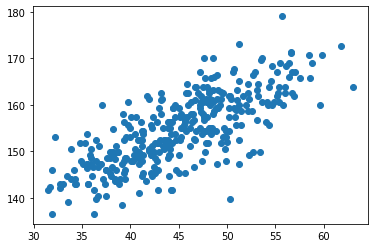

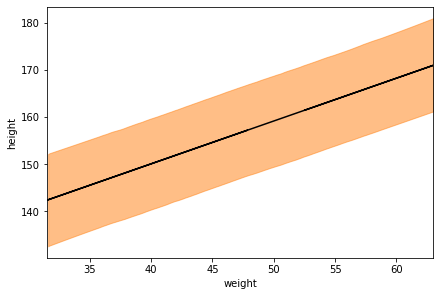

In [38]:

plt.scatter(df2.weight, df2.height)
#az.plot_hpd(weight_seq, mu_pred.T)
az.plot_hpd(df2.weight, posterior_predictive_determinist["height"])
plt.plot(df2.weight, tracedeterminist["alpha"].mean() + tracedeterminist["beta"].mean() * (df2.weight_c),color="black")
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(df2.weight.min(), df2.weight.max());

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


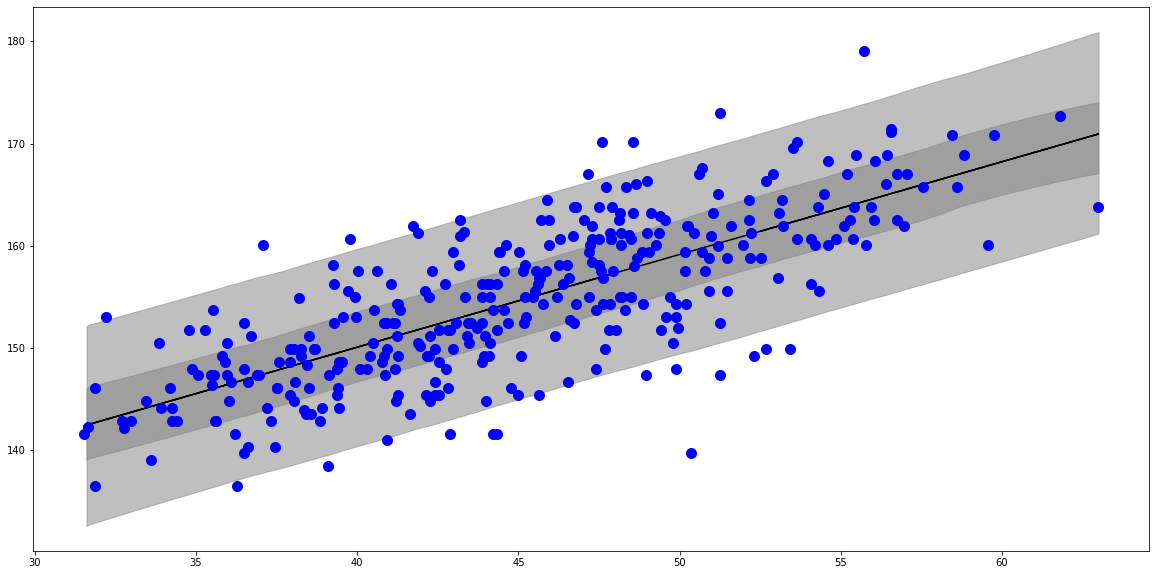

In [44]:
fig, ax = plt.subplots(figsize=(20,10))

az.plot_hpd(df2.weight, posterior_predictive_determinist["height"], credible_interval=0.5, color='gray', ax=ax)
az.plot_hpd(df2.weight, posterior_predictive_determinist["height"], credible_interval=0.94, color='gray', ax=ax)

plt.plot(df2.weight, tracedeterminist["alpha"].mean() + tracedeterminist["beta"].mean() * (df2.weight_c),color="black")
plt.plot(df2.weight, df2.height, 'b.', markersize=20)